## Data Visualization

### Import libraries

In [1]:
import os
import sqlite3
import pandas as pd
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib.style as style
sns.set_context('talk')
sns.set()

In [2]:
def create_connection(db_file, delete_db=False):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

In [3]:
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

#### Creating connection to the database.

In [4]:
PATH = os.getcwd()
conn = create_connection(os.path.join(PATH,"nyc-payroll.db"))

### Visualize categories

In [5]:
with conn:
    sql = "select RegularHoursCategory, OTHoursCategory, HourlyPayCategory, TotalPayCategory from Income;"
    df = pd.read_sql_query(sql, conn)

##### Visualize Regular Hours Category.

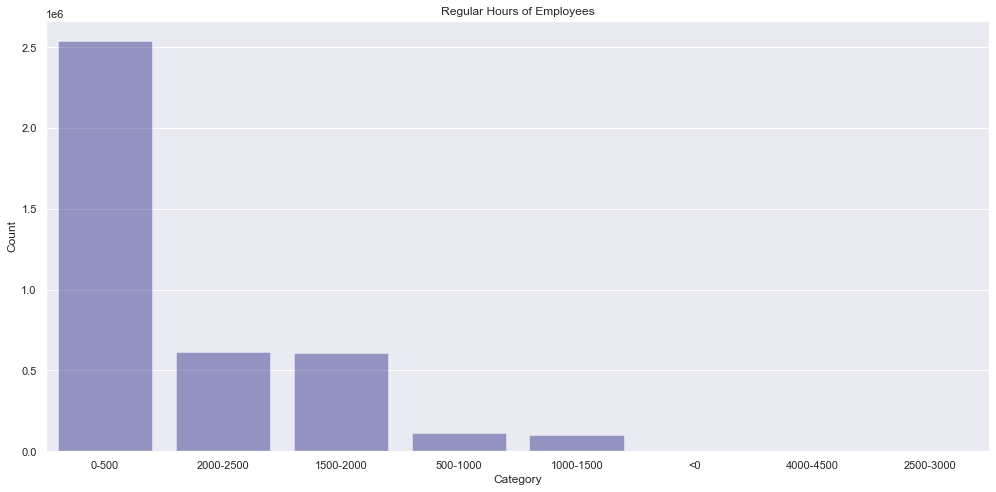

In [11]:
temp = pd.DataFrame(df['RegularHoursCategory'].value_counts().reset_index()).rename(columns={"index":"Count"})
plt.figure(figsize=(14,7))
sns.barplot(data=temp, x='Count',y='RegularHoursCategory', alpha=0.4, color='darkblue')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Regular Hours of Employees")
plt.tight_layout()

##### Visualize Over Time Hours category

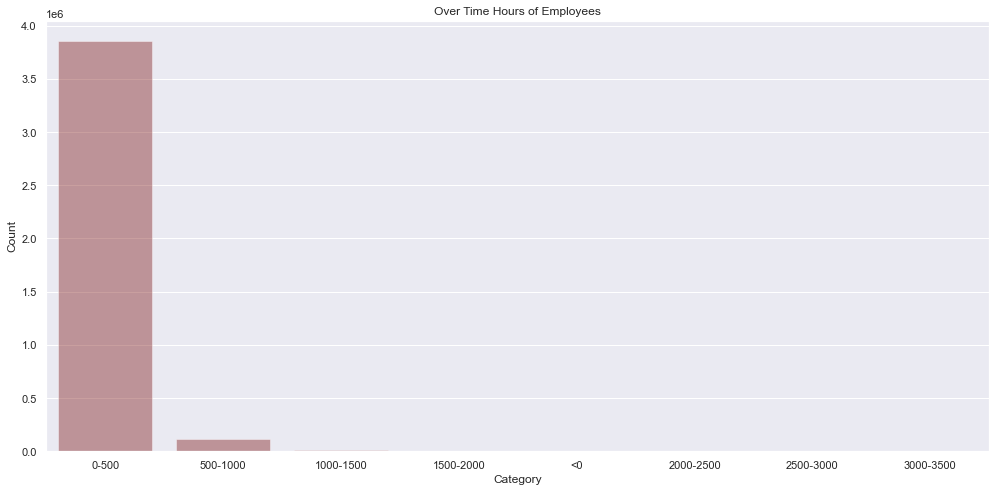

In [14]:
temp = pd.DataFrame(df['OTHoursCategory'].value_counts().reset_index()).rename(columns={"index":"Count"})
plt.figure(figsize=(14,7))
sns.barplot(data=temp, x='Count',y='OTHoursCategory', alpha=0.4, color='darkred')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Over Time Hours of Employees")
plt.tight_layout()

##### Visualize Total Pay category.

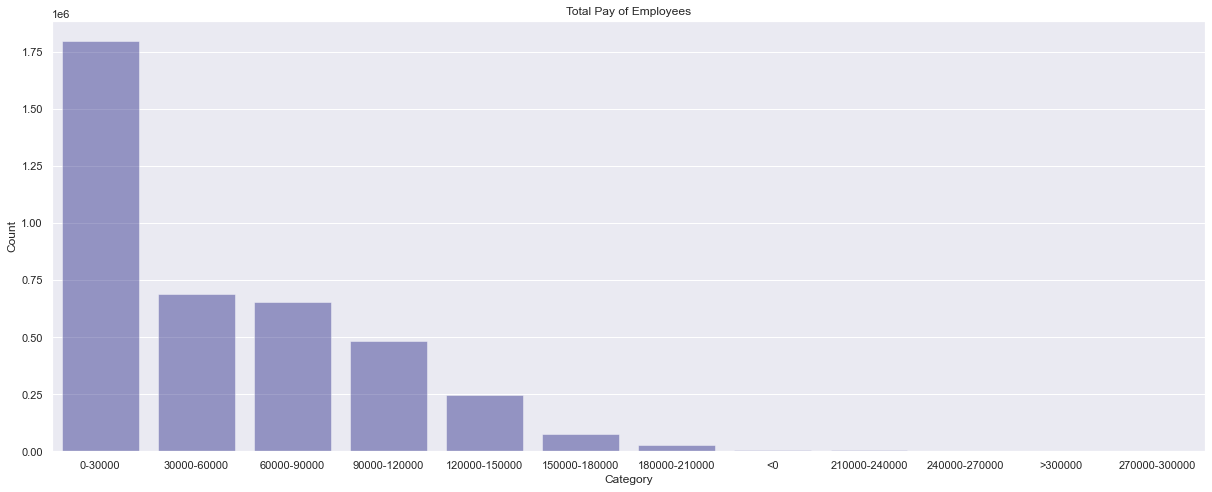

In [45]:
temp = pd.DataFrame(df['TotalPayCategory'].value_counts().reset_index()).rename(columns={"index":"Count"})
temp = temp.drop([12])
plt.figure(figsize=(17,7))
sns.barplot(data=temp, x='Count',y='TotalPayCategory', alpha=0.4, color='darkblue')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Total Pay of Employees")
plt.tight_layout()

##### Visualize Hourly Pay category

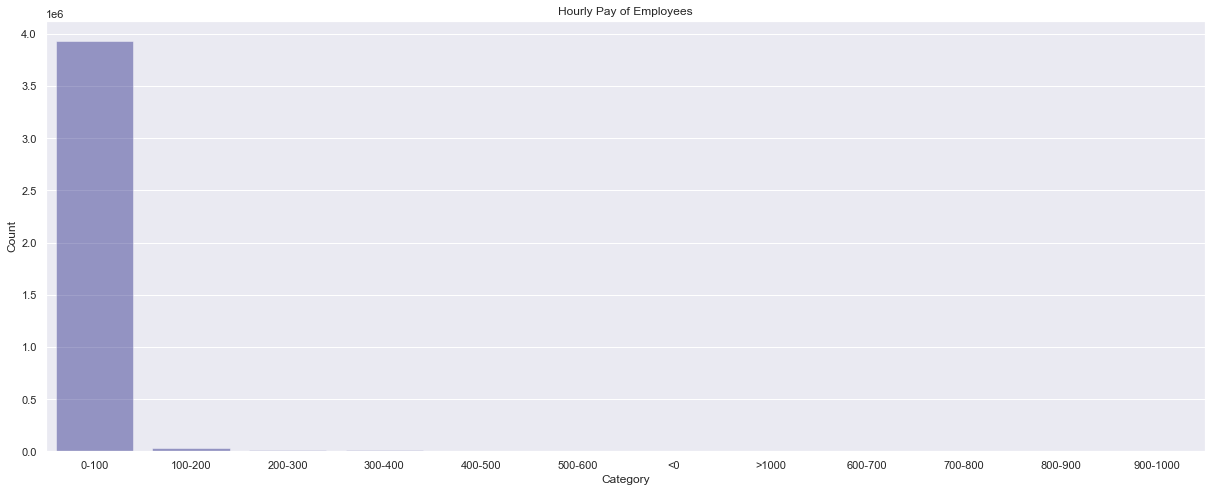

In [46]:
temp = pd.DataFrame(df['HourlyPayCategory'].value_counts().reset_index()).rename(columns={"index":"Count"})
plt.figure(figsize=(17,7))
sns.barplot(data=temp, x='Count',y='HourlyPayCategory', alpha=0.4, color='darkblue')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Hourly Pay of Employees")
plt.tight_layout()